In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import glob
%matplotlib inline

In [2]:
sale1 = pd.read_csv('File 01 - Sales Data.csv')
sale2 = pd.read_csv('File 02 - Sales Data.csv')
product = pd.read_csv('Product.csv')
retailer = pd.read_csv('Retailer.csv')
#merge together in sales
sales = pd.concat([sale1,sale2])

In [5]:
from scipy.sparse.linalg import svds

In [6]:
import seaborn as sns

#  pre-Analysis

## Retailer data descriptive statistics

In [13]:
retailer.head()

,Retailer Code,Sub Ret Cat Name,Zone Name,Region Name,Territory Name
0,ATHU0001,NORMAL,ZONE 02,COLOMBO 02 MAIN,ATHURUGIRIYA
1,ATHU0003,NORMAL,ZONE 02,COLOMBO 02 MAIN,ATHURUGIRIYA
2,ATHU0005,NORMAL,ZONE 02,COLOMBO 02 MAIN,ATHURUGIRIYA
3,ATHU0006,NORMAL,ZONE 02,COLOMBO 02 MAIN,ATHURUGIRIYA
4,ATHU0007,NORMAL,ZONE 02,COLOMBO 02 MAIN,ATHURUGIRIYA


In [14]:
retailer.shape

(6118, 5)

In [3]:
retailer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6118 entries, 0 to 6117
Data columns (total 5 columns):
Retailer Code       6110 non-null object
Sub Ret Cat Name    5872 non-null object
Zone Name           6110 non-null object
Region Name         6110 non-null object
Territory Name      6118 non-null object
dtypes: object(5)
memory usage: 239.1+ KB


#### select the missing values rows

In [4]:
# need to be drop
retailer[retailer.isnull().any(axis=1)].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246 entries, 554 to 5520
Data columns (total 5 columns):
Retailer Code       238 non-null object
Sub Ret Cat Name    0 non-null object
Zone Name           238 non-null object
Region Name         238 non-null object
Territory Name      246 non-null object
dtypes: object(5)
memory usage: 11.5+ KB


#### missing values bar chart

# Descriptive Statictics for Product data

In [15]:
product.head()

,Product Code,Product Description,Product Group Name,Brand Name,Sub Product Description
0,500003,BIEN AIME COLOGNE 50ML,Cologne,Bien Aime,REGULAR COLOGNE
1,500004,BIEN AIME COLOGNE 100ML,Cologne,Bien Aime,REGULAR COLOGNE
2,500031,BABY CHERAMY SHAMPOO 125ML old,SHAMPOO,Baby Cheramy,REGULAR SHAMPOO
3,500034,BIEN AIME COLOGNE 200ML,Cologne,Bien Aime,REGULAR COLOGNE
4,500047,BABY CHERAMY PRICKLY HEAT 100G,Talc & Powder,Baby Cheramy,PRICKLY HEAT TALC


In [16]:
product.shape

(457, 5)

In [7]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 5 columns):
Product Code               457 non-null int64
Product Description        457 non-null object
Product Group Name         457 non-null object
Brand Name                 457 non-null object
Sub Product Description    457 non-null object
dtypes: int64(1), object(4)
memory usage: 17.9+ KB


#### select the missing values rows

In [8]:
product[product.isnull().any(axis=1)].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 5 columns):
Product Code               0 non-null int64
Product Description        0 non-null object
Product Group Name         0 non-null object
Brand Name                 0 non-null object
Sub Product Description    0 non-null object
dtypes: int64(1), object(4)
memory usage: 0.0+ bytes


#### find the product qty by its brand name and group name

In [9]:
product.groupby(['Brand Name', 'Product Group Name'])[['Product Code']].count()

Product Code
Brand Name              Product Group Name                   
Baby Cheramy            BATH                                2
                        BODY LOTION                         6
                        CREAM                              23
                        Cologne                            37
                        GIFT BOX                            6
                        Oil                                 8
                        SHAMPOO                             7
                        Talc & Powder                      12
Baby soap               Soap                               18
Bien Aime               Cologne                             7
CHERAMY TOUCH           BODY LOTION                         7
COMMON BRAND (PS GL GY) Cologne                             6
Capri                   Cologne                             7
Cheramy                 BOTTLE WASH                         1
                        COTTON BUDS                         3
                        Diapers                            22
                        FEEDING BOTTLE                      4
                        LIQIUD WASH                         1
                        NAPPY WASH POWDER                   5
                        TEATS                               4
Clogard Toothpaste      MOUTH WASH                          4
DANDEX FAMILY           SHAMPOO                             5
DIVA                    Sachet                              1
Dandex                  HAIR GEL                            1
                        Hair Cream                          1
                        Oil                                 3
                        SHAMPOO                             5
Fems                    Sanitary Towels                    17
GODREJ                  HAIR DYE                           23
                        Hair Cream                         10
                        Sachet                              5
GOLD                    BODY SPRAY                         10
                        Cologne                            13
                        HAIR GEL                            2
                        Hair Cream                          2
Goya                    BODY LOTION                         3
                        BODY SPRAY                         19
                        Cologne                            11
                        Talc & Powder                       3
KUMARIKA                FACE WASH                           6
                        Oil                                 2
                        SHAMPOO                            29
KUMARIKA OIL            Oil                                18
Nimex                   DISPOSABLE CUPS                     1
                        FACIAL TISSUE                       7
                        KITCHEN TOWELS                      1
                        PAPER PLATES                        2
                        Paper Serviettes                    4
                        TOILET TISSUE                       5
PARIS                   BODY LOTION                         2
                        Cologne                             3
                        Talc & Powder                      16
ProSport                BODY SPRAY                          3
                        Cologne                             3
                        HAIR GEL                            7
                        Hair Cream                          2
                        PS Cologne & Aftershave            15
Velvet                  HAND WASH                           7

# Descriptive Statistics for Sale

#### infomation of sales data 

In [17]:
sales.head()

,Retailer Code,Rep,Product Code,Date,Net Sales Qty,Net Sales Value,Sales Return Qty,Sales Return Value
0,BORE0001,BORELLA - R1,500004,"Wednesday, June 20 2012",4,1014.00,0,0.00
1,BORE0001,BORELLA - R1,500053,"Wednesday, June 20 2012",3,349.14,0,0.00
2,BORE0001,BORELLA - R1,500053,"Tuesday, August 28 2012",3,349.14,0,0.00
3,BORE0001,BORELLA - R1,500053,"Saturday, March 23 2013",-6,-775.86,6,775.86
4,BORE0001,BORELLA - R1,500069,"Monday, April 02 2012",3,590.04,0,0.00


In [18]:
sales.shape

(1137470, 8)

In [19]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1137470 entries, 0 to 533110
Data columns (total 8 columns):
Retailer Code         1137470 non-null object
Rep                   1137470 non-null object
Product Code          1137470 non-null int64
Date                  1137470 non-null object
Net Sales Qty         1137470 non-null int64
Net Sales Value       1137470 non-null float64
Sales Return Qty      1137470 non-null int64
Sales Return Value    1137470 non-null float64
dtypes: float64(2), int64(3), object(3)
memory usage: 78.1+ MB


### distribution of  net sale qty before scale and remove null values

C:\Users\werag\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


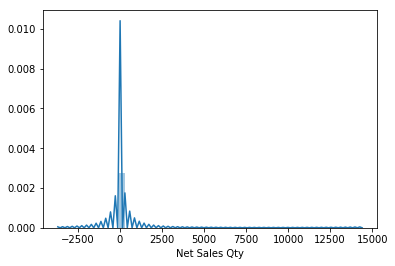

In [20]:
sns.distplot(sales['Net Sales Qty'])

####  missing values

In [21]:
sales[sales.isnull().any(axis=1)].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 8 columns):
Retailer Code         0 non-null object
Rep                   0 non-null object
Product Code          0 non-null int64
Date                  0 non-null object
Net Sales Qty         0 non-null int64
Net Sales Value       0 non-null float64
Sales Return Qty      0 non-null int64
Sales Return Value    0 non-null float64
dtypes: float64(2), int64(3), object(3)
memory usage: 0.0+ bytes


# Data preparation

##### Although there is no missing values in sales file, there are lot of missing values in Retailer data file. 
##### Therefore we need to eliminate the Retailer Code of sales file compare to Retailer data file to do descriptive stat

In [36]:
# drop all rows in Retailer file with NA values
retailer = retailer.dropna()

In [37]:
retailer[retailer.isnull().any(axis=1)].info() #we remove 346 rows

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 5 columns):
Retailer Code       0 non-null object
Sub Ret Cat Name    0 non-null object
Zone Name           0 non-null object
Region Name         0 non-null object
Territory Name      0 non-null object
dtypes: object(5)
memory usage: 0.0+ bytes


In [38]:
list_retailer = retailer['Retailer Code'].unique()

In [39]:
list_retailer

array(['ATHU0001', 'ATHU0003', 'ATHU0005', ..., 'PETH0704', 'PETH0706',
       'PETH0708'], dtype=object)

In [40]:
sales = sales[~sales['Retailer Code'].isin(list_retailer)]

In [41]:
sales.head()

,Retailer Code,Rep,Product Code,Date,Net Sales Qty,Net Sales Value,Sales Return Qty,Sales Return Value
65713,BORE0685,BORELLA - R1,500137,"Wednesday, March 25 2015",3,351.03,0,0.0
65714,BORE0685,BORELLA - R1,500137,"Monday, April 27 2015",2,234.02,0,0.0
65715,BORE0685,BORELLA - R1,501585,"Wednesday, November 26 2014",6,533.34,0,0.0
65716,BORE0685,BORELLA - R1,501763,"Monday, April 27 2015",2,270.02,0,0.0
65717,BORE0685,BORELLA - R1,501764,"Wednesday, November 26 2014",3,378.03,0,0.0


In [42]:
sales.shape

(172239, 8)

In [43]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172239 entries, 65713 to 533110
Data columns (total 8 columns):
Retailer Code         172239 non-null object
Rep                   172239 non-null object
Product Code          172239 non-null int64
Date                  172239 non-null object
Net Sales Qty         172239 non-null int64
Net Sales Value       172239 non-null float64
Sales Return Qty      172239 non-null int64
Sales Return Value    172239 non-null float64
dtypes: float64(2), int64(3), object(3)
memory usage: 11.8+ MB


#### we technically we removed 
## 965231 Rows

In [ ]:
sales['Net Sales Qty'].describe()

C:\Users\werag\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


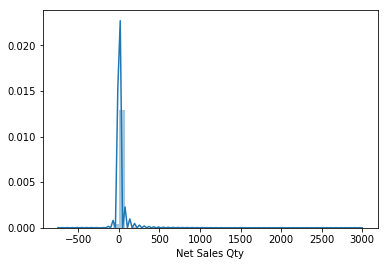

In [44]:
sns.distplot(sales['Net Sales Qty'])

In [45]:
sales.groupby(['Retailer Code','Product Code'])[['Net Sales Qty']].sum()

Net Sales Qty
Retailer Code Product Code               
ATHU1013      500137                   -3
              500175                    2
              500784                    1
              501764                   -1
              502379                   -6
              502380                  -12
              502427                   24
              502428                    3
              502429                    3
              502433                    3
              502447                  -14
              502500                  -30
              502501                   -3
              502631                    1
              502633                    2
              502703                    6
              604604                    0
ATHU1015      500137                   12
              500138                    2
              501763                   12
              501764                   12
              501765                    6
              501766                    6
              502427                    6
              502429                    2
              502433                    3
              502441                    1
              502452                    1
              502454                    1
              502456                    1
...                                   ...
WELL0824      502380                   -6
              502427                   99
              502428                    6
              502429                   12
              502430                   10
              502432                    2
              502433                    6
              502434                    6
              502437                    9
              502438                    3
              502439                    2
              502441                    2
              502455                   12
              502484                    2
              502534                    3
              502565                    2
              502566                    2
              502567                    2
              502568                    1
              502569                    1
              502570                    1
              502590                   12
              502632                    3
              502633                    3
              502659                    3
              502703                   12
              604187                   15
              604927                   12
              605464                    3
              605854                    1

[62710 rows x 1 columns]

In [46]:
sales.groupby('Retailer Code')[['Net Sales Qty']].agg(['count','min','mean','max','std'])

Net Sales Qty                                  
                      count min        mean   max         std
Retailer Code                                                
ATHU1013                 26 -18   -0.923077    12    6.324069
ATHU1015                 18   1    5.111111    18    5.166509
AVIS1091                 44   0   12.159091   150   27.843369
AVIS1094                 80 -12    6.150000    48    9.026122
AVIS1095                 34   0    5.058824    48    9.306046
AVIS1104                 71   0    4.788732    24    4.201753
AVIS1122                103   0    4.640777    24    5.357521
AVIS1123                155   0    4.741935    75    9.304962
AVIS1138                 81  -4    7.469136    90   11.854415
AVIS1170                102   1    5.950980   100   10.617916
BORE0685                 35   0    3.885714    12    2.730777
BORE0740                 42   0    9.238095   100   16.280783
DEHI0713                 41  -6    4.341463    25    6.609122
DEHI0714                 86   0    4.848837    48    6.207239
DEHI0715                199  -6    6.201005   150   14.555703
DEHI0716                112 -24    5.580357    48    9.560277
DEHI0720                  3   2   12.666667    24   11.015141
DEHI0721                171 -12    5.520468   150   13.608103
DEHI0724                 66 -48    4.121212    12    8.043182
DEHI0725                 51  -3    3.215686    12    2.484462
DEHI0726                125   0    5.584000    24    5.278049
DEHI0731                 43 -51    9.465116    48   16.708066
DEHI0734                231 -51    4.385281   150   13.643713
DEMA0628                 70 -10    7.942857   150   17.982186
DEMA0629                102 -12    5.323529    36    6.003566
DEMA0630                235 -36   10.451064   150   26.203525
DEMA0631                 88   0   12.534091   150   23.854419
DEMA0632                 27   0    5.444444    24    5.507571
DEMA0633                 36   0    7.305556    24    6.364273
DEMA0637                 33   0    5.818182    18    4.779216
...                     ...  ..         ...   ...         ...
WELL0547                666 -12    3.587087   150    7.052696
WELL0569                170 -37    6.323529    36    8.419197
WELL0570                131   0    4.389313    24    4.683149
WELL0571                 57  -6    4.491228    36    6.655081
WELL0584                 38   2    9.289474    48   12.006548
WELL0589                  6  -3    0.166667     6    4.535049
WELL0591                 24   2    5.958333    24    5.336333
WELL0592                 92   0    5.304348    48    6.899178
WELL0597                 14   2    5.428571    12    3.897026
WELL0600                  3   2    5.333333    12    5.773503
WELL0602                 50   1    4.660000    24    4.279090
WELL0603                 34  -8    8.117647    48   11.512219
WELL0604                 92  -3   10.097826   150   18.813754
WELL0605                 39   1   24.666667   750  119.297138
WELL0609                 81   1    4.925926    36    5.224409
WELL0610                  4   3    6.000000    12    4.242641
WELL0614                 11   2    5.000000    12    2.932576
WELL0615                 28   0    4.928571    12    3.848314
WELL0616                 51  -2    4.745098    24    4.348991
WELL0620                  2   4    4.000000     4    0.000000
WELL0621                 34   1    4.647059    15    3.716322
WELL0627                 81  -2    3.469136    24    3.959439
WELL0711                 96 -24    9.666667   150   23.440256
WELL0713                116   0  165.034483  2250  427.841497
WELL0741                171 -38    8.824561   150   23.714569
WELL0805                 52  -5    8.942308   150   26.248745
WELL0820                 67   0    4.208955    12    3.231180
WELL0822                101  -2    2.198020    24    3.515735
WELL0823                 61   0    5.196721    48    9.025556
WELL0824                 50 -12    4.920000    75   11.045065

[1267 rows x 5 columns]

#### pivot table before scaling

In [48]:
sales_pvt = sales.pivot_table(values='Net Sales Qty', index='Retailer Code', columns='Product Code', aggfunc='sum').fillna(0)
sales_pvt.head()

Product Code,500003,500004,500031,500034,500047,500053,500069,500070,500071,500084,...,605469,605470,605471,605472,605473,605474,605621,605636,605691,605854
Retailer Code,,,,,,,,,,,,,,,,,,,,,
ATHU1013,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ATHU1015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AVIS1091,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AVIS1094,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AVIS1095,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Take the sample 

In [49]:
sampleSales = sales.sample(n=250)


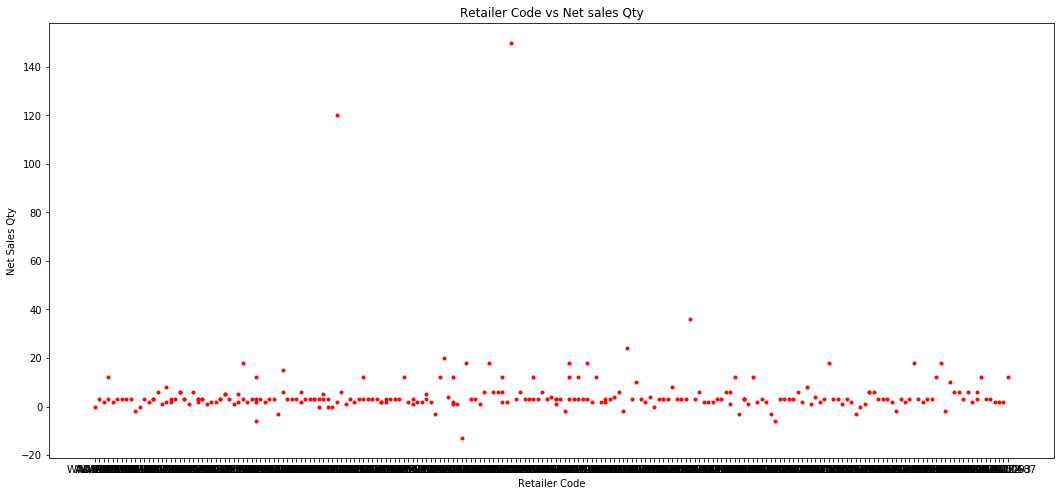

In [50]:
plt.plot(sampleSales['Retailer Code'], sampleSales['Net Sales Qty'],'r.')
plt.title("Retailer Code vs Net sales Qty")
plt.xlabel('Retailer Code')
plt.ylabel('Net Sales Qty')
plt.gcf().set_size_inches(18, 8)

#### boxplot with sales qty

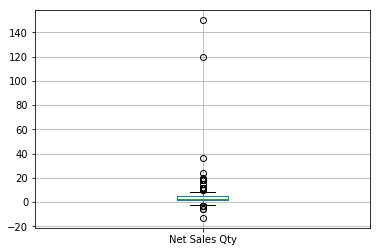

In [51]:
sampleSales.boxplot(column=['Net Sales Qty'])

#### Descreiptive statictics in sale QTY